# Chapter 3 - Regression Models

## Segment 1 - Simple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [6]:
rooms = 2*np.random.rand(100, 1)+3 # 1 is number of elements in array
rooms

array([[4.38762259],
       [4.54990111],
       [4.7131287 ],
       [4.77324683],
       [3.61997774],
       [3.24373333],
       [3.75274851],
       [4.77796089],
       [4.14484896],
       [3.86543008],
       [4.11590337],
       [4.26316268],
       [4.81278663],
       [3.29404101],
       [3.85445636],
       [4.50049485],
       [3.67303895],
       [4.44995244],
       [3.51717246],
       [4.85043197],
       [3.13727373],
       [4.68778849],
       [3.22846968],
       [4.87910247],
       [4.2170265 ],
       [3.10682947],
       [4.56503442],
       [4.08190028],
       [3.74858243],
       [3.4443154 ],
       [4.8913018 ],
       [3.90555276],
       [3.24603713],
       [3.19749978],
       [4.30320917],
       [3.21312654],
       [3.97879268],
       [3.09747674],
       [3.33171783],
       [3.20534003],
       [3.89524478],
       [4.66062302],
       [4.35086589],
       [4.79208206],
       [4.55285299],
       [4.45492821],
       [4.08585006],
       [4.439

In [7]:
rooms[1:10]

array([[4.54990111],
       [4.7131287 ],
       [4.77324683],
       [3.61997774],
       [3.24373333],
       [3.75274851],
       [4.77796089],
       [4.14484896],
       [3.86543008]])

In [8]:
price = 265+6*rooms + abs(np.random.randn(100, 1))
price[1:10]

array([[293.09103352],
       [293.67931908],
       [293.97212497],
       [287.11166707],
       [284.96826618],
       [287.84079702],
       [293.83087775],
       [290.70163635],
       [288.71798   ]])

Text(0, 0.5, '2019 Average Home, 1000s USD')

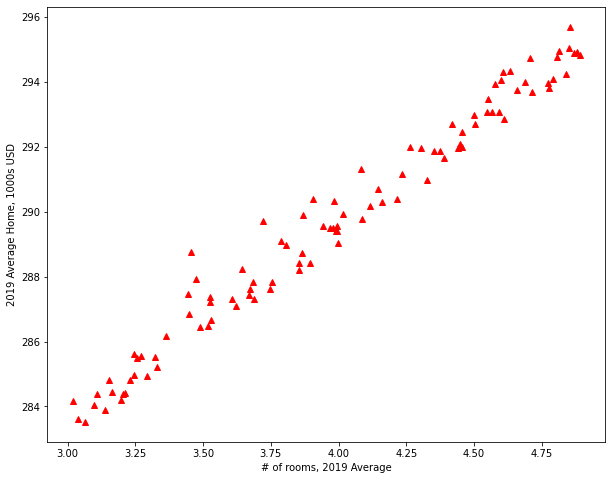

In [9]:
plt.plot(rooms, price, 'r^')
plt.xlabel('# of rooms, 2019 Average')
plt.ylabel('2019 Average Home, 1000s USD')

In [11]:
X = rooms
y = price

LinReg = LinearRegression()
LinReg.fit(X, y)
print(LinReg.intercept_, LinReg.coef_)

[265.54876428] [[6.05449911]]


*Simple Algebra*
- y = mx + b
- b = intercept = 265.55

*Estimated Coefficients*
- LinReg.coeff_ = [6.0544] Estimated coefficients for the terms in linear regression problem

In [12]:
print(LinReg.score(X,y))

0.973401166974144


## Segment 2 - Multiple linear regression

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [15]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [17]:
pip install seaborn

In [18]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

## (Multiple) linear regressio on the enrollment data

In [23]:
address = 'C:/Users/User/Exercise Files 2/Data/enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


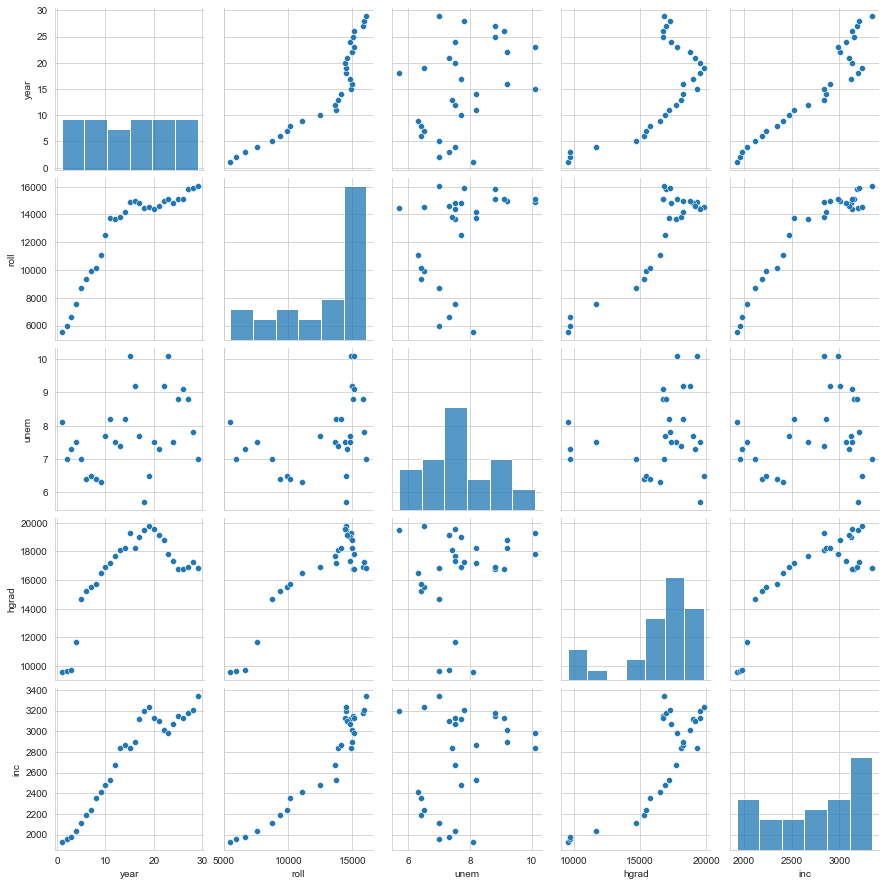

In [24]:
sb.pairplot(enroll)

In [25]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [27]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target

## Check for missing values

In [29]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [32]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

print(LinReg.score(X,y))

0.8488812666133723


## Segment 3 - Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

# Logistic regression on the titanic dataset

In [5]:
address = 'C:/Users/User/Exercise Files 2/Data/titanic-training-data.csv'
titanic_training = pd.read_csv(address)
titanic_training.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
print(titanic_training.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [12]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### VARIABLE DESCRIPTION

- Survived - Survived (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Sibling/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare (British pound)
- Cabin-Cabin
- Embarked - Port of embarkation (C = Cherbourg, France; Q = Queenstown, UK; Southampton = Cobh, Ireland;

### Check that your target variable is binary

<AxesSubplot:xlabel='Survived', ylabel='count'>

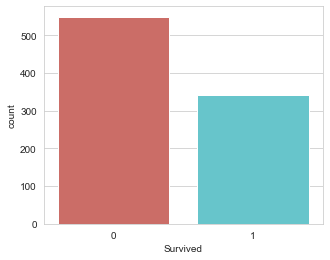

In [14]:
sb.countplot(x='Survived', data=titanic_training, palette='hls')

### Check for missing values

In [24]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Taking care of missing values
##### Dropping missing values
So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:
- Survived - This variable is obviously relevant.
- Pclass - Does a passenger's class on the boat affect their survivability?
- Sex - Could a passenger's gender impact their survival rate?
- Age - Does a person's age impact their survival rate?
- SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
- Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
- Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
- Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.

What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. And as you recall, the cabin variable is almost all missing values, so we can just drop all of these.

In [26]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Inputting missing values

<AxesSubplot:xlabel='Parch', ylabel='Age'>

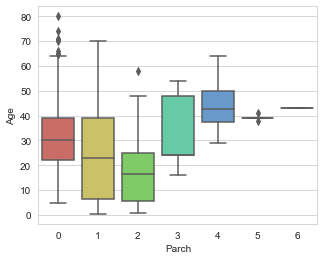

In [22]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls')

In [18]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,448.126679,0.357006,2.249520,32.178503,0.257198,27.283276
1,477.345455,0.554545,2.163636,24.422000,1.027273,48.273714
2,397.338235,0.573529,2.147059,17.216912,1.573529,67.175062
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [19]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
    else:
            return Age

In [20]:
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [27]:
# Removing rows that have missing values in Embarked: 891-2=889

titanic_data.dropna(inplace=True) # dropna() function return Index without NA/NaN values. All the missing values are removed and a new object is returned which does not have any NaN values present in it.
titanic_data.reset_index(inplace=True, drop=True) # reset index after dropping

print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 50.2+ KB
None


## Converting categorical variables to dummy indicators

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [29]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [30]:
# 1 = male/0 = female

gender_DF = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_DF.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [33]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2])

In [34]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns = ['C', 'Q', 'S'])
embarked_DF.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [35]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [36]:
titanic_dmy = pd.concat([titanic_data, gender_DF, embarked_DF], axis=1, verify_integrity=True).astype(float)
titanic_dmy[0:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


## Checking for independence between features

<AxesSubplot:>

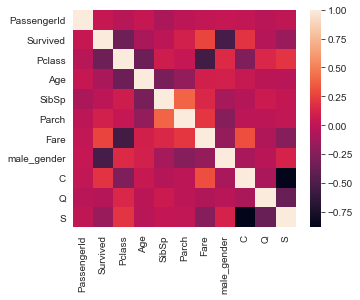

In [37]:
sb.heatmap(titanic_dmy.corr())

In [38]:
titanic_dmy.drop(['Fare', 'Pclass'], axis=1, inplace=True)
titanic_dmy.head()

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


## Checking that your dataset size is sufficient

In [39]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    float64
 1   Survived     712 non-null    float64
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    float64
 4   Parch        712 non-null    float64
 5   male_gender  712 non-null    float64
 6   C            712 non-null    float64
 7   Q            712 non-null    float64
 8   S            712 non-null    float64
dtypes: float64(9)
memory usage: 50.2 KB


In [40]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1),
                                                   titanic_dmy['Survived'], test_size=0.2,
                                                    random_state=200)

In [41]:
print(X_train.shape)
print(y_train.shape)

(569, 8)
(569,)


In [42]:
X_train[0:5]

,PassengerId,Age,SibSp,Parch,male_gender,C,Q,S
425,538.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0
269,338.0,41.0,0.0,0.0,0.0,1.0,0.0,0.0
8,10.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0
516,656.0,24.0,2.0,0.0,1.0,0.0,0.0,1.0
491,624.0,21.0,0.0,0.0,1.0,0.0,0.0,1.0


## Deploying and evaluating the model

In [45]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [46]:
y_pred = LogReg.predict(X_test)

## Model Evaluation

### Classification report without cross-validation

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78        73
         1.0       0.80      0.67      0.73        70

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.76      0.76      0.75       143



## K-fold cross-validation & confusion matrices

In [49]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)
#299 and 52 are correct predictions whereas 70 and 148 are incorrect predictions

array([[299,  52],
       [ 70, 148]], dtype=int64)

In [50]:
precision_score(y_train, y_train_pred)

0.74

## Make a test prediction

In [52]:
titanic_dmy[711:712]

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
711,891.0,0.0,32.0,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
test_passenger = np.array([891, 30, 0,0,0,0,0,1]).reshape(1,-1)

print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger))

[1.]
[[0.24679783 0.75320217]]


# Chapter 4 - Clustering Models

## Segment 1 - K-means method

### Setting up for clustering analysis

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [55]:
%matplotlib inline
plt.figure(figsize=(7, 4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [58]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Building and running your model

In [59]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

## Plotting your model output

In [60]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

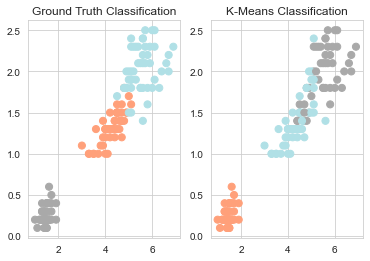

In [61]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

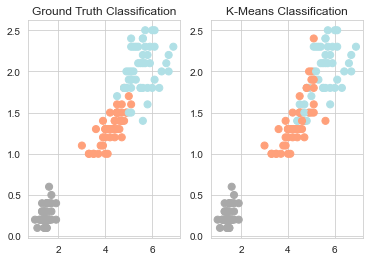

In [63]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

## Evaluate your clustering results

In [64]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [69]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [66]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [73]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values

y = cars.iloc[:,(9)].values

## Using scipy to generate dendrograms

In [71]:
Z = linkage(X, 'ward')

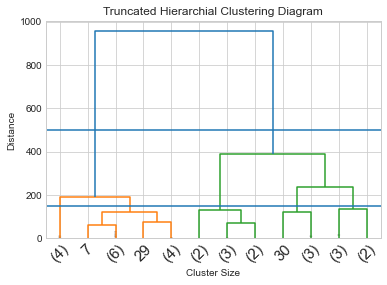

In [72]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

## Generating hierarchical clusters

In [75]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [76]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [77]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875

## Segment 3 - DBSCan clustering to identify outliers

In [78]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [79]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## DBSCan clustering to identify outliers

### Train your model and identify outliers

In [83]:
# with this example, we're going to use the same data that we used for the
# rest of this chapter. So we're going to copy and paste in the code

address = 'C:/Users/User/Exercise Files 2/Data/iris.data.csv'
df = pd.read_csv(address, header=None, sep=',')

df.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

data = df.iloc[:, 0:4].values
target = df.iloc[:,4].values

df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(eps=0.8, min_samples=19)


### Visualize your results

In [85]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

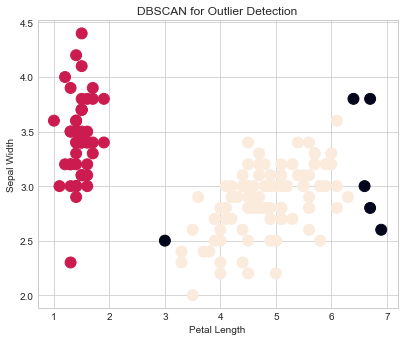

In [91]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:, 2], data[:, 1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')

# Chapter 5 - Dimenstionality Reduction Methods

## Segment 1 - Explanatory factor analysis

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

## Factor analysis on iris dataset

In [3]:
iris = datasets.load_iris()

X = iris.data
variable_names = iris.feature_names

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
factor = FactorAnalysis().fit(X)

DF = pd.DataFrame(factor.components_, columns=variable_names)
DF

# Factor 1 (0) is highest loading for sepal length, petal length and petal width (highly influential)
# Factor 2 (1) does not have high loadings on any of them, so drop it for reainder of evaluation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


## Segment 2 - Principal Component Analysis (PCA)

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn import datasets

In [9]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## PCA on the iris dataset

In [11]:
iris = datasets.load_iris()

X = iris.data
variable_names = iris.feature_names

X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [13]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_.sum()

1.0

In [15]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


<AxesSubplot:>

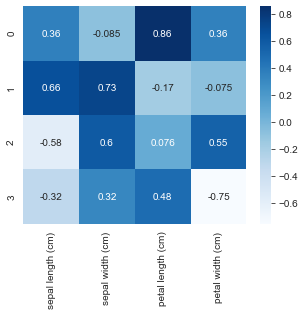

In [17]:
sb.heatmap(comps, cmap='Blues', annot=True)

# principal component 1(0) is strongly positively correlated with petal length and moderately positively correlated with sepal length and petal width and slightly negatively correlated with sepal width
# principal component 2(1) is strongly negatively correlated with petal length and petal width

# Chapter 6 - Other Popular MAchine Learning Methods

## Segment 1 - Association Rule Mining Using Apriori Algorithm

In [2]:
pip install mlxtend

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Data Format

In [6]:
address = 'C:/Users/User/Exercise Files 2/Data/groceries.csv'
data = pd.read_csv(address)

In [7]:
data.head()

,1,2,3,4,5,6,7,8,9
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN


## Data Conversion

In [10]:
basket_sets = pd.get_dummies(data)
basket_sets.head()

,1_Instant food products,1_UHT-milk,1_artif. sweetener,1_baby cosmetics,1_bags,1_baking powder,1_bathroom cleaner,1_beef,1_berries,1_beverages,...,9_sweet spreads,9_tea,9_vinegar,9_waffles,9_whipped/sour cream,9_white bread,9_white wine,9_whole milk,9_yogurt,9_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Support Calculation

In [24]:
apriori(basket_sets, min_support=0.02)

,support,itemsets
0,0.030421,(7)
1,0.034951,(17)
2,0.029126,(23)
3,0.049191,(26)
4,0.064401,(47)
5,0.044660,(83)
6,0.024272,(90)
7,0.040453,(92)
8,0.038835,(99)
9,0.033981,(100)


In [14]:
apriori(basket_sets, min_support=0.02, use_colnames=True)

,support,itemsets
0,0.030421,(1_beef)
1,0.034951,(1_canned beer)
2,0.029126,(1_chicken)
3,0.049191,(1_citrus fruit)
4,0.064401,(1_frankfurter)
5,0.044660,(1_other vegetables)
6,0.024272,(1_pip fruit)
7,0.040453,(1_pork)
8,0.038835,(1_rolls/buns)
9,0.033981,(1_root vegetables)


In [25]:
df = basket_sets
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.030421,(1_beef),1
1,0.034951,(1_canned beer),1
2,0.029126,(1_chicken),1
3,0.049191,(1_citrus fruit),1
4,0.064401,(1_frankfurter),1
5,0.044660,(1_other vegetables),1
6,0.024272,(1_pip fruit),1
7,0.040453,(1_pork),1
8,0.038835,(1_rolls/buns),1
9,0.033981,(1_root vegetables),1


In [27]:
frequent_itemsets[frequent_itemsets['length'] >= 1]

,support,itemsets,length
0,0.030421,(1_beef),1
1,0.034951,(1_canned beer),1
2,0.029126,(1_chicken),1
3,0.049191,(1_citrus fruit),1
4,0.064401,(1_frankfurter),1
5,0.044660,(1_other vegetables),1
6,0.024272,(1_pip fruit),1
7,0.040453,(1_pork),1
8,0.038835,(1_rolls/buns),1
9,0.033981,(1_root vegetables),1


## Association Rules

### Confidence

In [28]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


# Lift

In [29]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_other vegetables),(3_whole milk),0.058900,0.057929,0.021036,0.357143,6.165204,0.017624,1.465444
1,(3_whole milk),(2_other vegetables),0.057929,0.058900,0.021036,0.363128,6.165204,0.017624,1.477693


## Lift and Confidence

In [30]:
rules[(rules['lift'] >= 5) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


## Segment 2 - A neural network with a Perceptron

In [35]:
import numpy as np
import pandas as pd 
import sklearn

from pandas import Series, DataFrame
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
from sklearn.linear_model import Perceptron

In [39]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
standardize = StandardScaler()

standardized_X_test = standardize.fit_transform(X_test)

standardized_X_train = standardize.fit_transform(X_train)

In [47]:
standardized_X_test[0:10]

array([[ 0.71793955, -0.41209276,  0.81634999,  0.46089903],
       [-0.47862636,  0.98746757, -1.24984601, -1.43121278],
       [-0.3456746 , -1.34513298,  0.02633387, -0.12128922],
       [-1.01043343,  1.22072762, -1.31061648, -0.84902453],
       [ 1.24974662,  0.2876874 ,  0.57326811,  0.46089903],
       [-0.21272283, -0.41209276,  0.69480905,  1.18863434],
       [ 0.98384308,  0.05442735,  1.24174328,  1.47972846],
       [-0.47862636,  1.68724773, -1.37138695, -1.43121278],
       [ 0.98384308, -0.41209276,  0.51249763,  0.46089903],
       [-0.07977106, -0.41209276,  0.20864528,  0.16980491]])

In [49]:
perceptron = Perceptron(max_iter=50, eta0=0.15, tol=1e-3, random_state=15)

perceptron.fit(standardized_X_train, y_train.ravel())

Perceptron(eta0=0.15, max_iter=50, random_state=15)

In [53]:
y_pred = perceptron.predict(standardized_X_test)

In [50]:
print(y_test)

[2 0 1 0 1 2 2 0 1 1 2 2 0 2 2 1 1 0 0 1 0 1 1 1 0 1 2 0 1 2]


In [54]:
print(y_pred)

[1 0 1 0 1 2 2 0 1 1 2 2 0 2 2 1 2 0 0 1 0 1 1 1 0 2 2 0 1 2]


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.83      0.87        12
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



## Segment 3 - Instance-based learning w/ k-Nearest Neighbour

### Setting up for classification analysis

In [58]:
import numpy as np
import pandas as pd
import scipy
import urllib 
import sklearn

import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline
rcParams["figure.figsize"] = 7, 4
plt.style.use('seaborn-whitegrid')

In [66]:
address = 'C:/Users/User/Exercise Files 2/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X_prime = cars[['mpg', 'disp', 'hp', 'wt']].values
y = cars.iloc[:,9].values

In [68]:
X = preprocessing.scale(X_prime)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17)

## Build and Train your model with training data

In [71]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier()


## Evaluating your model's predictions

In [73]:
y_pred = clf.predict(X_test)
y_expect = y_test

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



## Segment 5 - Naive Bayes Classifiers

In [74]:
import numpy as np
import pandas as pd
import urllib 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [76]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

## Naive Bayes

### Using Naive Bayes to predict spam

In [82]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

import urllib.request

raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=',')
print(dataset[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [85]:
X = dataset[:,0:48]

y = dataset[:,-1]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17)

In [90]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=True)
0.8577633007600435


In [91]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

y_expect = y_test
y_pred = MultiNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

MultinomialNB()
0.8816503800217155


In [92]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

y_expect = y_test
y_pred = GausNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

GaussianNB()
0.8197611292073833


In [93]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=0.1)
0.9109663409337676


## Ensemble methods with random forest

- This is a classification problem, wherein we will be estimationg the species label for iris flowers

In [95]:
import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

y.columns = ['labels']

print(df.head())
y[0:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,labels
0,0
1,0
2,0
3,0
4,0


The data set contains information on the:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)
- species type

In [101]:
df.isnull().any()==True

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [102]:
y.labels.value_counts()

0    50
1    50
2    50
Name: labels, dtype: int64

## Preparing the data for training the model

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=17)

## Build a Random Forest model

In [104]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

y_train_array = np.ravel(y_train)

classifier.fit(X_train, y_train_array)

y_pred = classifier.predict(X_test)

## Evaluating the model on the test data

In [105]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [106]:
y_test_array = np.ravel(y_test)
print(y_test_array)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]


In [107]:
print(y_pred)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]
